INTRODUCTION TO PANDAS - By Sridhar Nerur (with a lot of help from the Internet and other sources!!!)

1. Pandas is arguably the most widely used Python module for Machine Learning.
2. Pandas allows us to store data in a tabular format, much like the format you
    use with Excel, CSV files, etc.
3. The data structure that makes this possible is called a DataFrame.
4. This tutorial is an introduction to Pandas DataFrames.
5. If you wish to learn more, read Wes McKinney's excellent book "Python for Data Analysis"

Let us get started..........


In [1]:
#Suppress warnings...
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Let us create a dataframe with the following columns: user_id, movie_id, rating
import pandas as pd
reviews = {"user_id": [1, 1, 2, 2, 2, 3, 4, 4, 4, 4],
           "movie_id": ["m1", "m2", "m1", "m3", "m4", "m1", "m2", "m3", "m5", "m6"],
           "rating": [2, 5, 4, 3, 5, 1, 4, 5, 3, 1]}
#let us create a DataFrame - a tabular format that should remind you of a spreadsheet
df = pd.DataFrame(reviews)
df

,user_id,movie_id,rating
0,1,m1,2
1,1,m2,5
2,2,m1,4
3,2,m3,3
4,2,m4,5
5,3,m1,1
6,4,m2,4
7,4,m3,5
8,4,m5,3
9,4,m6,1


In [3]:
#let us list all the columns
df.columns

Index(['user_id', 'movie_id', 'rating'], dtype='object')

In [4]:
#let us look at the index
df.index

RangeIndex(start=0, stop=10, step=1)

In [5]:
#let us get some information about the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   10 non-null     int64 
 1   movie_id  10 non-null     object
 2   rating    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
#let us look at the data types
df.dtypes

user_id      int64
movie_id    object
rating       int64
dtype: object

In [5]:
#let us get some basic statistics on the rating column
mean_rating = df['rating'].mean()
max_rating = df.rating.max() #note that df['rating'] and df.rating are equivalent
std_rating = df['rating'].std()
var_rating = df['rating'].var()
median_rating = df.rating.median()
#let us display all the variables
print(mean_rating, median_rating, max_rating, std_rating, var_rating)

3.3 3.5 5 1.567021236472421 2.4555555555555553


In [6]:
#here is an easier way to get all the basic stats
df.rating.describe()

count    10.000000
mean      3.300000
std       1.567021
min       1.000000
25%       2.250000
50%       3.500000
75%       4.750000
max       5.000000
Name: rating, dtype: float64

In [7]:
#let us see how many unique movie ids we have
df.movie_id.nunique()


6

In [9]:
df.movie_id.unique() #will give you a list of unique movie ids

array(['m1', 'm2', 'm3', 'm4', 'm5', 'm6'], dtype=object)

In [8]:
#displaying selected columns, say, user id and movie id
df[["user_id", "movie_id"]]

,user_id,movie_id
0,1,m1
1,1,m2
2,2,m1
3,2,m3
4,2,m4
5,3,m1
6,4,m2
7,4,m3
8,4,m5
9,4,m6


In [9]:
#display user 1's records
df[df['user_id'] == 1] #you can use boolean logic - & | (AND, OR)

,movie_id,rating,user_id
0,m1,2,1
1,m2,5,1


In [10]:
#display all movies that received a rating higher than 3
df[df['rating'] > 3]['movie_id']
#Or ....
df.loc[df['rating'] > 3, 'movie_id']

1    m2
2    m1
4    m4
6    m2
7    m3
Name: movie_id, dtype: object

In [11]:
#let us look at the average ratings per movie id
df.groupby('movie_id').mean()['rating']

movie_id
m1    2.333333
m2    4.500000
m3    4.000000
m4    5.000000
m5    3.000000
m6    1.000000
Name: rating, dtype: float64

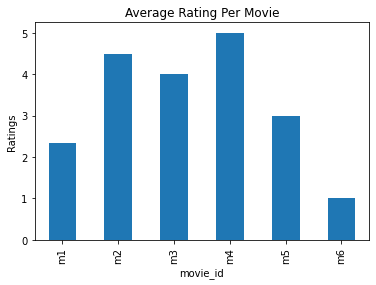

In [3]:
#let us plot a bar chart of average ratings per movie id
import matplotlib.pyplot as plt
df.groupby('movie_id').mean()['rating'].plot(kind='bar',x='movie_id',y='rating', title="Average Rating Per Movie")
plt.ylabel("Ratings")
plt.show()

In [13]:
#let us create a movies dataframe
movies = {"movie_id": ["m1","m2","m3","m4","m5","m6","m7","m8","m9","m10"],
          "title": ["The Jungle Book", "The Godfather", "The Untouchables","Enter The Dragon",\
                   "The Scent of a Woman","The Good, The Bad, and The Ugly","The Bourne Supremacy", \
                   "For a Few Dollars More", "The Golden Rendezvous", "Ice Station Zebra"]}
movies_df = pd.DataFrame(movies)
movies_df

,movie_id,title
0,m1,The Jungle Book
1,m2,The Godfather
2,m3,The Untouchables
3,m4,Enter The Dragon
4,m5,The Scent of a Woman
5,m6,"The Good, The Bad, and The Ugly"
6,m7,The Bourne Supremacy
7,m8,For a Few Dollars More
8,m9,The Golden Rendezvous
9,m10,Ice Station Zebra


In [14]:
#let us merge the two dataframes using movie id as the key
merged_df = pd.merge(df, movies_df, on = 'movie_id') #default is an inner join
merged_df[['user_id','movie_id','title','rating']]

,user_id,movie_id,title,rating
0,1,m1,The Jungle Book,2
1,2,m1,The Jungle Book,4
2,3,m1,The Jungle Book,1
3,1,m2,The Godfather,5
4,4,m2,The Godfather,4
5,2,m3,The Untouchables,3
6,4,m3,The Untouchables,5
7,2,m4,Enter The Dragon,5
8,4,m5,The Scent of a Woman,3
9,4,m6,"The Good, The Bad, and The Ugly",1


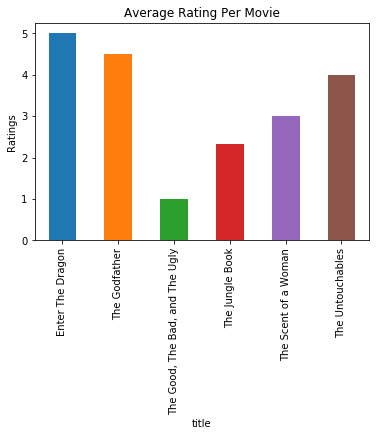

In [16]:
#let us redraw the bar chart with movie names
merged_df.groupby('title').mean()['rating'].plot(kind='bar',y='rating', title="Average Rating Per Movie")
plt.ylabel("Ratings")
plt.show()

Now, let us see how we can read in a CSV file. We will use a method called read_csv. Likewise, we can use a method called read_excel to read in an Excel file. Let us get started. I will be reading in a file called "iris.csv" (this has been uploaded to Blackboard). This dataset is often used to demonstrate machine learning algorithms. The goal is to predict the species of a flower based on 4 predictors - sepal length, sepal width, petal length, petal width. 

In [4]:
import pandas as pd
iris_data = pd.read_csv("iris.csv")
#display the first five observations
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
#Let us rename the column called "variety" - we will change it to "class"
iris_data.rename(columns = {"variety": "class"}, inplace = True) #inplace is to rename and save the dataframe

In [4]:
#let us examine the last 5 observations
iris_data.tail()

,sepal.length,sepal.width,petal.length,petal.width,class
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [13]:
#how many rows and columns do we have?
iris_data.shape #it should have 150 rows and 5 columns (4 predictors and a class/target to be predicted)

(150, 5)

In [24]:
#get some information about the variables
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
#let us get some descriptive statistics
iris_data.describe().T #same as iris_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


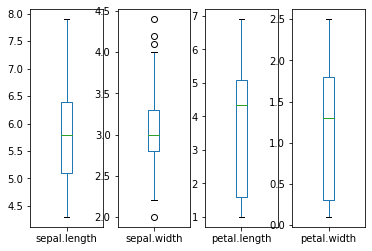

In [9]:
import matplotlib.pyplot as plt
#how about a box plot of the variables
iris_data.plot(kind='box', subplots = True)
plt.show()


In [10]:
#Useful to understand how dict works
dict(boxes='DarkRed', whiskers='DarkGreen',\
              medians='DarkBlue', caps='Gray')

{'boxes': 'DarkRed',
 'whiskers': 'DarkGreen',
 'medians': 'DarkBlue',
 'caps': 'Gray'}

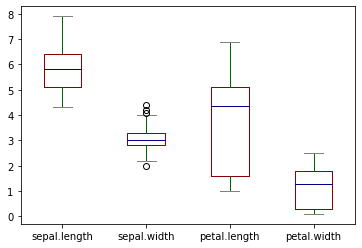

In [10]:
#let us try some colors
color = dict(boxes='DarkRed', whiskers='DarkGreen',\
              medians='DarkBlue', caps='Gray')
iris_data.plot(kind='box', color = color)
plt.show()

In [15]:
#Are the variables correlated?
iris_data.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


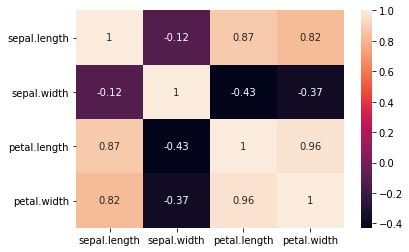

In [11]:
#how about a heatmap? I will be using a module called seaborn - you may get it by 
#typing: pip install seaborn
import seaborn as sns
sns.heatmap(iris_data.corr(),annot = True)
plt.show()

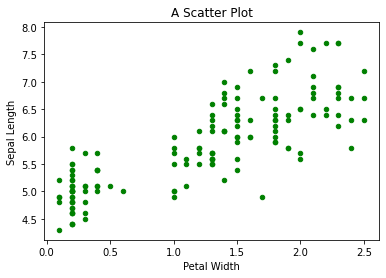

In [12]:
#let us draw a scatter plot of petal width vs sepallength
iris_data.plot(kind = 'scatter', x = 'petal.width', y = 'sepal.length', title = "A Scatter Plot", color = 'green')
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.show()

<AxesSubplot:xlabel='petal.width', ylabel='sepal.length'>

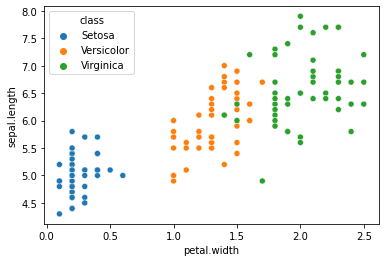

In [13]:
sns.scatterplot(x="petal.width", y="sepal.length", data=iris_data, hue="class")

In [14]:
#let us count the number of occurrences of each species
iris_data['class'].value_counts() #value_counts is used on a Pandas Series

Setosa        50
Versicolor    50
Virginica     50
Name: class, dtype: int64

We need to convert categorical variables to numbers to perform any type of analysis on our dataset. In this dataset, there is only one categorical variable - the class that we have to predict. We need to convert the three categories to numbers (e.g., 0, 1, and 2). We will look at 3 approaches for doing this......

In [8]:
#using a dictionary with map
iris_data_copy = iris_data.copy()
iris_data_copy['class'] = iris_data['class'].map({'Virginica': 0, 'Versicolor': 1, 'Setosa': 2})
iris_data_copy.head()
#iris_data_copy['class'].value_counts()

,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [9]:
#using category accessor code
iris_data_copy1 = iris_data.copy()
iris_data_copy1['class'] = iris_data_copy1['class'].astype('category')
iris_data_copy1['class'] = iris_data_copy1['class'].cat.codes
iris_data_copy1.head()
#iris_data_copy1['class'].value_counts()

,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
#Third approach: Using a LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris_data_copy2 = iris_data.copy()
iris_data_copy2['class'] = encoder.fit_transform(iris_data_copy2['class'])
#iris_data_copy2['class'].value_counts()
iris_data_copy2.head()

,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


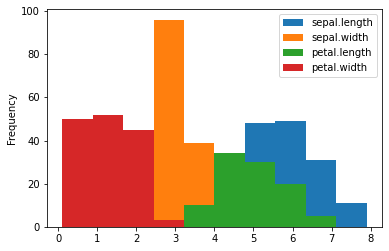

In [12]:
#how about drawing some histograms
#only the predictors will be used
iris_data_predictors = iris_data_copy2[['sepal.length','sepal.width','petal.length','petal.width']]
iris_data_predictors.plot.hist()
plt.show()

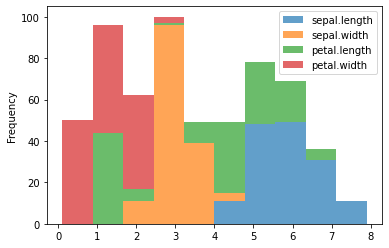

In [13]:
iris_data_predictors.plot.hist(stacked=True, alpha = 0.7) #alpha is for transparency
plt.show()

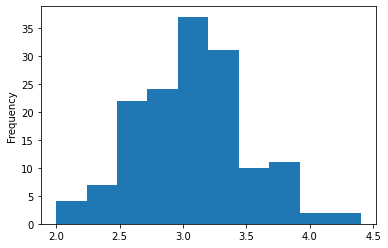

In [14]:
#what is I am interested in just one predictor?
iris_data_predictors['sepal.width'].plot.hist()
plt.show()

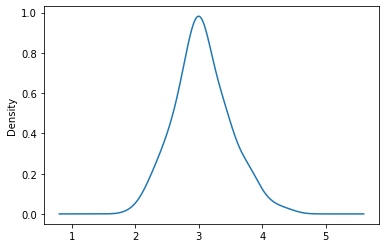

In [15]:
#how about a density plot
iris_data_predictors['sepal.width'].plot.kde()
plt.show()

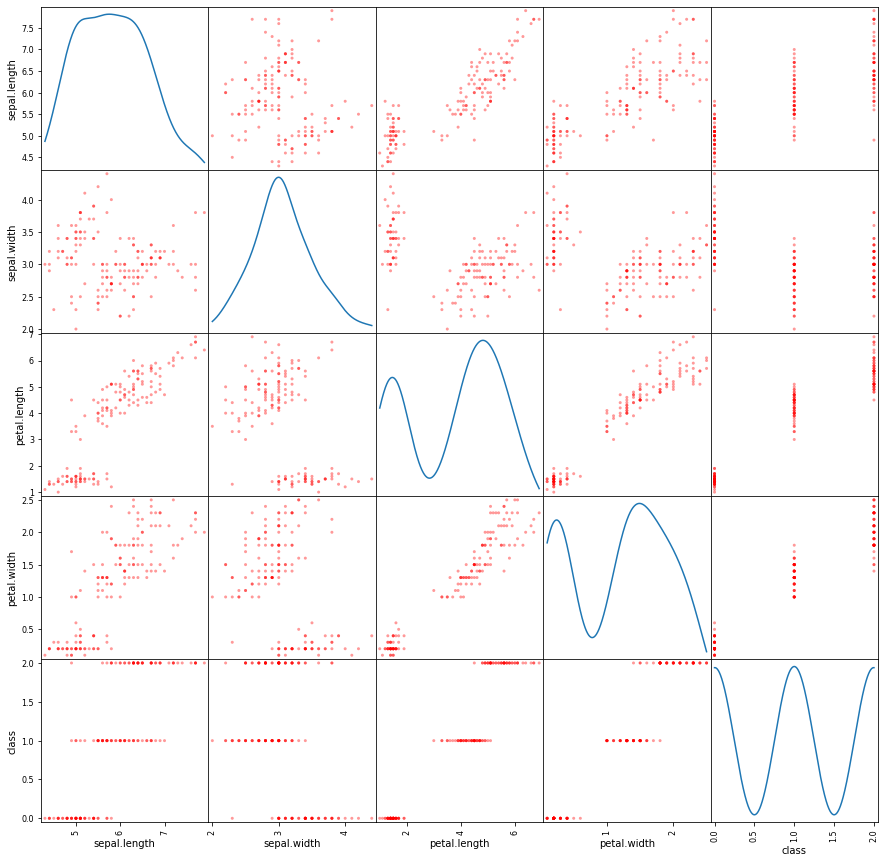

In [16]:
#Let us get a scatter matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(iris_data_copy2, figsize=(15,15), alpha = 0.4, diagonal = 'kde', color = 'red')
plt.show()

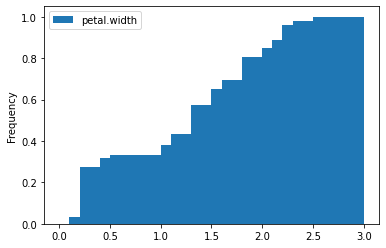

In [18]:
#let us look at a cumulative distribution
iris_data_copy1.plot(y='petal.width', kind='hist', bins=30,range=(0,3), cumulative=True, density=True)
plt.show()

In [19]:
#how do we deal with missing values? I will be using a different toy dataset for this
#let us first create a dataframe with some missing values
import numpy as np
customers = {"Name": ["Doug Walters", "Viv Richards", "Ian Chappell", "Richard Hadlee", "Andy Roberts"],
             "Age": [37, 34, np.nan, 53, 61],
             "Income": [100000.00, 112000.00, 101000.00, 95000.00, 99000.00],
             "CreditHistory": ["Good", "Good", "Good", "Bad", np.nan],
             "Profession": ["Programmer", "Data Analyst", "Data Analyst", "Programmer", "Programmer"]}
#Note: np.nan is used to represent a missing value
customers_df = pd.DataFrame(customers)
customers_df

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.0,100000.0,Good,Programmer
1,Viv Richards,34.0,112000.0,Good,Data Analyst
2,Ian Chappell,NaN,101000.0,Good,Data Analyst
3,Richard Hadlee,53.0,95000.0,Bad,Programmer
4,Andy Roberts,61.0,99000.0,NaN,Programmer


In [21]:
#let us display all columns that have NaNs
customers_df.loc[:, customers_df.isnull().any()]

,Age,CreditHistory
0,37.0,Good
1,34.0,Good
2,NaN,Good
3,53.0,Bad
4,61.0,NaN


In [88]:
#select columns that don't have NaNs
customers_df.loc[:, customers_df.notnull().all()]

,Income,Name,Profession
0,100000.0,Doug Walters,Programmer
1,112000.0,Viv Richards,Data Analyst
2,101000.0,Ian Chappell,Data Analyst
3,95000.0,Richard Hadlee,Programmer
4,99000.0,Andy Roberts,Programmer


In [22]:
#deleting rows that have NaNs
customers_df.dropna(axis = 0) #axis = 0 is for rows, axis = 1 would drop columns (see next example)

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.0,100000.0,Good,Programmer
1,Viv Richards,34.0,112000.0,Good,Data Analyst
3,Richard Hadlee,53.0,95000.0,Bad,Programmer


In [23]:
customers_df.dropna(axis = 1)

,Name,Income,Profession
0,Doug Walters,100000.0,Programmer
1,Viv Richards,112000.0,Data Analyst
2,Ian Chappell,101000.0,Data Analyst
3,Richard Hadlee,95000.0,Programmer
4,Andy Roberts,99000.0,Programmer


In [24]:
#let us replace the missing age with the mean age of customers
mean = customers_df.Age.mean()
customers_df['Age'] = customers_df['Age'].fillna(mean)
customers_df

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.00,100000.0,Good,Programmer
1,Viv Richards,34.00,112000.0,Good,Data Analyst
2,Ian Chappell,46.25,101000.0,Good,Data Analyst
3,Richard Hadlee,53.00,95000.0,Bad,Programmer
4,Andy Roberts,61.00,99000.0,NaN,Programmer


In [25]:
#Set age of Chappell back to nan
import numpy as np
customers_df.loc[customers_df['Name'] == "Ian Chappell", 'Age'] = np.nan
customers_df

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.0,100000.0,Good,Programmer
1,Viv Richards,34.0,112000.0,Good,Data Analyst
2,Ian Chappell,NaN,101000.0,Good,Data Analyst
3,Richard Hadlee,53.0,95000.0,Bad,Programmer
4,Andy Roberts,61.0,99000.0,NaN,Programmer


In [26]:
#let us use Python's Impute class
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(customers_df[['Age']])
imputed_train_df = imp_mean.transform(customers_df[['Age']])
customers_df['Age'] = imputed_train_df
customers_df

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.00,100000.0,Good,Programmer
1,Viv Richards,34.00,112000.0,Good,Data Analyst
2,Ian Chappell,46.25,101000.0,Good,Data Analyst
3,Richard Hadlee,53.00,95000.0,Bad,Programmer
4,Andy Roberts,61.00,99000.0,NaN,Programmer


In [27]:
#Let us use a package called impyute to impute a value for age - first reset the age to Nan
customers_df.loc[customers_df['Name'] == "Ian Chappell", 'Age'] = np.nan
#let us convert categorical variables to dummies
df = pd.get_dummies(customers_df, columns = ['CreditHistory', 'Profession'], drop_first = True) #this replaces nan with 0
df.loc[df['Name'] == 'Andy Roberts','CreditHistory_Good'] = np.nan #setting it back to nan
df


,Name,Age,Income,CreditHistory_Good,Profession_Programmer
0,Doug Walters,37.0,100000.0,1.0,1
1,Viv Richards,34.0,112000.0,1.0,0
2,Ian Chappell,NaN,101000.0,1.0,0
3,Richard Hadlee,53.0,95000.0,0.0,1
4,Andy Roberts,61.0,99000.0,NaN,1


In [29]:
!pip install impyute

  Using cached impyute-0.0.8-py2.py3-none-any.whl (31 kB)


In [30]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(df[['Age','CreditHistory_Good']].values, k=3)
imputed_training

array([[37.        ,  1.        ],
       [34.        ,  1.        ],
       [39.55718088,  1.        ],
       [53.        ,  0.        ],
       [61.        ,  0.82826807]])

In [32]:
!pip install fancyimpute

  Using cached fancyimpute-0.5.5.tar.gz (20 kB)
  Using cached knnimpute-0.1.0.tar.gz (8.3 kB)
     |████████████████████████████████| 861 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 25.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached ecos-2.0.7.post1.tar.gz (126 kB)
     |████████████████████████████████| 164 kB 67.3 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 9.1 MB/s  eta 0:00:01


  Created wheel for fancyimpute: filename=fancyimpute-0.5.5-py3-none-any.whl size=26455 sha256=d81eb74002949e5e6afeff0cb06d8c3a410c00ea5a2afeed606ff39b2cfe88cd
  Stored in directory: /Users/snerur/Library/Caches/pip/wheels/fc/a1/09/732183800f7c813b6698e5a15bf1b47d52b037ec76d7277aa5
  Created wheel for ecos: filename=ecos-2.0.7.post1-cp38-cp38-macosx_10_9_x86_64.whl size=84158 sha256=4f6f5d574f71acb4114eee63e1d231c2a8feaab585abef4f0526bc4dd238700f
  Stored in directory: /Users/snerur/Library/Caches/pip/wheels/c3/c1/ce/b551b0b3a40c990e1da2ec9aecff62f7c2d43cab8766368e82
  Created wheel for scs: filename=scs-2.1.4-cp38-cp38-macosx_10_13_x86_64.whl size=120632 sha256=e49a67542a6e725ee53043bc3fbedf370c1fdeb70729e61ecf654fb9a27e67e2
  Stored in directory: /Users/snerur/Library/Caches/pip/wheels/f9/1b/79/5e399d671778e7a7770bc72053a60cac6c0a2abc3f548cd909
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11354 sha256=365d918992886ef78023b18935a45216fd2ef6d1ecf591c20d

In [33]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute #pip install fancyimpute
df = pd.get_dummies(customers_df, columns = ['CreditHistory', 'Profession'], drop_first = True) #this replaces nan with 0
df.loc[df['Name'] == 'Andy Roberts','CreditHistory_Good'] = np.nan #setting it back to nan
df

,Name,Age,Income,CreditHistory_Good,Profession_Programmer
0,Doug Walters,37.0,100000.0,1.0,1
1,Viv Richards,34.0,112000.0,1.0,0
2,Ian Chappell,NaN,101000.0,1.0,0
3,Richard Hadlee,53.0,95000.0,0.0,1
4,Andy Roberts,61.0,99000.0,NaN,1


In [34]:
nan_matrix = df[['Age','Income','CreditHistory_Good','Profession_Programmer']]
new_matrix = KNN(k=3).fit_transform(nan_matrix)
pd.DataFrame(new_matrix, columns = ['Age','Income','CreditHistory_Good','Profession_Programmer'] )

Imputing row 1/5 with 0 missing, elapsed time: 0.001


,Age,Income,CreditHistory_Good,Profession_Programmer
0,37.000000,100000.0,1.000000,1.0
1,34.000000,112000.0,1.000000,0.0
2,40.720932,101000.0,1.000000,0.0
3,53.000000,95000.0,0.000000,1.0
4,61.000000,99000.0,0.949129,1.0


In [35]:
#Let us try MICE - Multiple Imputation by Chained Equations
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(df[['Age','CreditHistory_Good']].values)
imputed_training

array([[37.        ,  1.        ],
       [34.        ,  1.        ],
       [35.47095058,  1.        ],
       [53.        ,  0.        ],
       [61.        , -0.43372152]])

In [38]:
!pip install yfinance

     |████████████████████████████████| 4.6 MB 2.0 MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=d23d13b2a84debfe294f9c416ab195fc1aaededf27d18942733d91b9bacdf65b
  Stored in directory: /Users/snerur/Library/Caches/pip/wheels/7e/d5/f4/f628965651f61ae35c2bdc73571ce1a2026e1550a336b5ad4b
Successfully built yfinance


In [39]:
import yfinance as yf #pip install fix_yahoo_finance
import matplotlib.pyplot as plt
start_date = '2018-01-01'
end_date = '2018-04-15'
data = yf.download("AAPL", start=start_date, end=end_date)
data.loc['2018-Mar':'2018-Apr', :] #slice by date

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-01,44.634998,44.945000,43.165001,43.750000,42.138268,195208000
2018-03-02,43.200001,44.075001,43.112499,44.052502,42.429626,153816000
2018-03-05,43.802502,44.435001,43.630001,44.205002,42.576511,113605600
2018-03-06,44.477501,44.562500,44.032501,44.167500,42.540394,95154000
2018-03-07,43.735001,43.962502,43.567501,43.757500,42.145489,126814000
2018-03-08,43.869999,44.279999,43.767502,44.235001,42.605404,95096400
2018-03-09,44.490002,45.000000,44.347500,44.994999,43.337402,128740800
2018-03-12,45.072498,45.597500,45.052502,45.430000,43.756374,128828400
2018-03-13,45.647499,45.875000,44.810001,44.992500,43.334995,126774000


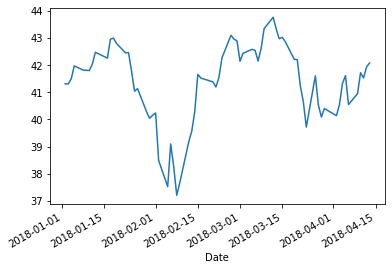

In [40]:
data['Adj Close'].plot()
plt.show()

In [41]:
#reading datasets from a link - let us read in the titanic dataset
titanic_df = pd.read_csv("https://assets.datacamp.com/production/course_1639/datasets/titanic.csv")
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [42]:
#how many classes did the ship have [e.g., first class]
titanic_df['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [43]:
#how many survived from each class?
survival_by_class = titanic_df.groupby('pclass')['survived'].value_counts()
survival_by_class

pclass  survived
1       1           200
        0           123
2       0           158
        1           119
3       0           528
        1           181
Name: survived, dtype: int64

This is the end of the tutorial. Note that this is by no means a complete coverage of the capabilties of Pandas. Be sure to read Wes 